1. Download data

In [ ]:

# train disruptions (2011–2024)
!wget -r -l1 -A "*.csv" -nd -P ./data_homework/disruptions/ https://opendata.rijdendetreinen.nl/public/disruptions/

# train services (2019–2025)
!wget https://opendata.rijdendetreinen.nl/public/services/services-2025.csv.gz -O ./data_homework/services-2025.csv.gz
!gunzip ./data_homework/services-2025.csv.gz

!wget https://opendata.rijdendetreinen.nl/public/services/services-2024.csv.gz -O ./data_homework/services-2024.csv.gz
!gunzip ./data_homework/services-2024.csv.gz

!wget https://opendata.rijdendetreinen.nl/public/services/services-2023.csv.gz -O ./data_homework/services-2023.csv.gz
!gunzip ./data_homework/services-2023.csv.gz

!wget https://opendata.rijdendetreinen.nl/public/services/services-2022.csv.gz -O ./data_homework/services-2022.csv.gz
!gunzip ./data_homework/services-2022.csv.gz

!wget https://opendata.rijdendetreinen.nl/public/services/services-2021.csv.gz -O ./data_homework/services-2021.csv.gz
!gunzip ./data_homework/services-2021.csv.gz

!wget https://opendata.rijdendetreinen.nl/public/services/services-2020.csv.gz -O ./data_homework/services-2020.csv.gz
!gunzip ./data_homework/services-2020.csv.gz

!wget https://opendata.rijdendetreinen.nl/public/services/services-2019.csv.gz -O ./data_homework/services-2019.csv.gz
!gunzip ./data_homework/services-2019.csv.gz


./data_homework/distances-2022.csv: No such file or directory
./data_homework/stations-2023.csv: No such file or directory
--2025-10-29 18:51:03--  https://opendata.rijdendetreinen.nl/public/disruptions/
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 188.114.97.10, 188.114.96.10, 2a06:98c1:3121::9, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|188.114.97.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./data_homework/disruptions/index.html.tmp’

index.html.tmp          [ <=>                ]   1,71K  --.-KB/s    in 0s      

2025-10-29 18:51:04 (46,5 MB/s) - ‘./data_homework/disruptions/index.html.tmp’ saved [1755]

Loading robots.txt; please ignore errors.
--2025-10-29 18:51:04--  https://opendata.rijdendetreinen.nl/robots.txt
Reusing existing connection to opendata.rijdendetreinen.nl:443.
HTTP request sent, awaiting response... 200 OK
Length: 25 [text/plain]
Saving t

In [ ]:
# railway stations (2023)
!wget https://opendata.rijdendetreinen.nl/public/stations/stations-2023-09-nl.csv -O ./data_homework/stations-2023.csv


--2025-10-29 19:22:20--  https://opendata.rijdendetreinen.nl/public/stations/stations-2023-09-nl.csv
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 188.114.96.9, 188.114.97.9, 2a06:98c1:3120::9, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|188.114.96.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44473 (43K) [application/octet-stream]
Saving to: ‘./data_homework/stations-2023.csv’

./data_homework/sta 100%[===================>]  43,43K  --.-KB/s    in 0,02s   

2025-10-29 19:22:21 (2,68 MB/s) - ‘./data_homework/stations-2023.csv’ saved [44473/44473]



In [13]:
# inter-station distances (2022)
!wget https://opendata.rijdendetreinen.nl/public/tariff-distances/tariff-distances-2022-01.csv -O ./data_homework/distances-2022.csv

--2025-10-29 19:44:29--  https://opendata.rijdendetreinen.nl/public/tariff-distances/tariff-distances-2022-01.csv
Resolving opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)... 188.114.96.10, 188.114.97.10, 2a06:98c1:3121::9, ...
Connecting to opendata.rijdendetreinen.nl (opendata.rijdendetreinen.nl)|188.114.96.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583534 (570K) [application/octet-stream]
Saving to: ‘./data_homework/distances-2022.csv’

./data_homework/dis 100%[===================>] 569,86K  --.-KB/s    in 0,1s    

2025-10-29 19:44:29 (5,03 MB/s) - ‘./data_homework/distances-2022.csv’ saved [583534/583534]



## 2. Stations table 

In [10]:
import duckdb

db = duckdb.connect('data_homework/train.duckdb')

db.sql(f"""
  CREATE OR REPLACE TABLE stations AS
  SELECT * FROM './data_homework/stations-2023.csv'
""")


In [12]:
db.sql("SELECT * FROM stations LIMIT 5").show()

┌───────┬─────────┬─────────┬────────────┬──────────────────┬───────────────────────┬──────────────────────┬─────────┬───────────────────────────┬─────────────────┬─────────────────┐
│  id   │  code   │   uic   │ name_short │   name_medium    │       name_long       │         slug         │ country │           type            │     geo_lat     │     geo_lng     │
│ int64 │ varchar │  int64  │  varchar   │     varchar      │        varchar        │       varchar        │ varchar │          varchar          │     double      │     double      │
├───────┼─────────┼─────────┼────────────┼──────────────────┼───────────────────────┼──────────────────────┼─────────┼───────────────────────────┼─────────────────┼─────────────────┤
│   266 │ HT      │ 8400319 │ Den Bosch  │ 's-Hertogenbosch │ 's-Hertogenbosch      │ s-hertogenbosch      │ NL      │ knooppuntIntercitystation │        51.69048 │         5.29362 │
│   269 │ HTO     │ 8400320 │ Dn Bosch O │ 's-Hertogenb. O. │ 's-Hertogenbosch Oost │

## 3. Distance Table and distance long 

In [14]:
db.sql("""
    CREATE TABLE distances AS
    SELECT *
    FROM read_csv('data_homework/distances-2022.csv',
    nullstr = 'XXX'
    );
""")

In [16]:
db.sql("SELECT * FROM distances LIMIT 5").show()

┌─────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬─────

In [15]:
db.sql("""
CREATE TABLE distances_long AS
    UNPIVOT distances
    ON COLUMNS (* EXCLUDE station)
    INTO NAME other_station VALUE distance;
""")

In [17]:
db.sql("SELECT * FROM distances_long LIMIT 5").show()

┌─────────┬───────────────┬──────────┐
│ Station │ other_station │ distance │
│ varchar │    varchar    │  int64   │
├─────────┼───────────────┼──────────┤
│ AC      │ AH            │       82 │
│ AC      │ AHP           │       83 │
│ AC      │ AHPR          │       85 │
│ AC      │ AHZ           │       90 │
│ AC      │ AKL           │       71 │
└─────────┴───────────────┴──────────┘



## 4. disruptions table 

In [18]:
db.sql("""
       CREATE TABLE disruptions AS
       SELECT *
       FROM read_csv('data_homework/disruptions/*.csv');
""")

In [19]:
db.sql("SELECT * FROM disruptions LIMIT 5").show()

┌────────┬──────────────────────────────────┬────────────────────────────────────┬──────────────┬───────────────────┬───────────────────┬────────────────────────────┬───────────────────────┬────────────────────────────┬───────────────────────┬───────────────┬─────────────────────┬─────────────────────┬──────────────────┐
│ rdt_id │             ns_lines             │             rdt_lines              │ rdt_lines_id │ rdt_station_names │ rdt_station_codes │          cause_nl          │       cause_en        │    statistical_cause_nl    │ statistical_cause_en  │  cause_group  │     start_time      │      end_time       │ duration_minutes │
│ int64  │             varchar              │              varchar               │   varchar    │      varchar      │      varchar      │          varchar           │        varchar        │          varchar           │        varchar        │    varchar    │      timestamp      │      timestamp      │      int64       │
├────────┼─────────────────────

## 5-6. File Parquet and create services

In [21]:
db.sql("""
    COPY(
       SELECT * 
       FROM read_csv_auto('data_homework/services-*.csv'))
       TO './data_homework/services.parquet' (FORMAT PARQUET);
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [22]:


db.sql("""
       CREATE TABLE services AS
       SELECT * 
       FROM read_parquet('./data_homework/services.parquet')
""")



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [23]:
db.sql("SELECT * FROM services LIMIT 5").show()

┌────────────────┬──────────────┬──────────────┬─────────────────┬──────────────────────┬──────────────────────────────┬──────────────────────────┬───────────────────────┬─────────────┬───────────────────┬────────────────────┬─────────────────────┬────────────────────┬────────────────────────┬─────────────────────┬──────────────────────┬──────────────────────────┬──────────────────────┬───────────────────────┬──────────────────────┐
│ Service:RDT-ID │ Service:Date │ Service:Type │ Service:Company │ Service:Train number │ Service:Completely cancelled │ Service:Partly cancelled │ Service:Maximum delay │ Stop:RDT-ID │ Stop:Station code │ Stop:Station name  │  Stop:Arrival time  │ Stop:Arrival delay │ Stop:Arrival cancelled │ Stop:Departure time │ Stop:Departure delay │ Stop:Departure cancelled │ Stop:Platform change │ Stop:Planned platform │ Stop:Actual platform │
│     int64      │     date     │   varchar    │     varchar     │        int64         │           boolean            │      

## 7.i)   
How many trains departed from Amsterdam Central station overall?

In [26]:

db.sql("""
    SELECT COUNT(*) AS ams_total_departures
    FROM services 
    WHERE "Stop:Station name" = 'Amsterdam Centraal' AND "Stop:Departure time" IS NOT NULL;
""")



┌──────────────────────┐
│ ams_total_departures │
│        int64         │
├──────────────────────┤
│              1667971 │
└──────────────────────┘

## 7.ii)
Calculate the average arrival delay of different service types (Service:Type). Order results descending by average delay.

In [29]:
db.sql("""
SELECT "Service:Type" AS service_type, AVG("Stop:Arrival delay") AS avg_arr_delay
FROM services
WHERE "Stop:Arrival delay" IS NOT NULL
GROUP BY service_type
ORDER BY avg_arr_delay DESC;
""")



┌──────────────────────┬────────────────────┐
│     service_type     │   avg_arr_delay    │
│       varchar        │       double       │
├──────────────────────┼────────────────────┤
│ Alpen Express        │  31.84254143646409 │
│ Krokus Express       │ 18.304347826086957 │
│ European Sleeper     │ 12.175902506323293 │
│ Nightjet             │  9.012493009863528 │
│ Eurostar             │   6.91274113952445 │
│ Thalys               │ 5.3961896909446025 │
│ ICE International    │  5.308921044515267 │
│ Int. Trein           │  4.947807104584243 │
│ Nachttrein           │   4.27683615819209 │
│ Stoomtrein           │  3.366863905325444 │
│     ·                │                 ·  │
│     ·                │                 ·  │
│     ·                │                 ·  │
│ stoptrein            │                0.0 │
│ Tram ipv trein       │                0.0 │
│ Metro                │                0.0 │
│ Snelbus i.p.v. trein │                0.0 │
│ Niet instappen       │          

## 7.iii)
What was the most common disruption cause in different years? MODE function may be useful.

In [31]:

db.sql("""
SELECT 
EXTRACT(YEAR FROM "start_time") AS year,
mode("cause_en") AS most_common_cause
FROM disruptions
GROUP BY year
""")



┌───────┬───────────────────┐
│ year  │ most_common_cause │
│ int64 │      varchar      │
├───────┼───────────────────┤
│  2011 │ broken down train │
│  2012 │ points failure    │
│  2013 │ points failure    │
│  2014 │ broken down train │
│  2015 │ broken down train │
│  2016 │ broken down train │
│  2017 │ broken down train │
│  2018 │ broken down train │
│  2019 │ broken down train │
│  2020 │ broken down train │
│  2021 │ broken down train │
│  2022 │ broken down train │
│  2023 │ broken down train │
│  2024 │ broken down train │
├───────┴───────────────────┤
│ 14 rows         2 columns │
└───────────────────────────┘

## 7.iv)   
How many trains started their overall service in any Amsterdam station?

In [32]:
db.sql("""
SELECT COUNT(DISTINCT "Service:RDT-ID") AS ams_starts
FROM services
WHERE "Stop:Arrival time" IS NULL AND lower("Stop:Station name") LIKE 'amsterdam%';
""")

┌────────────┐
│ ams_starts │
│   int64    │
├────────────┤
│    1081685 │
└────────────┘

## 7.v) What fraction of services was run to final destinations outside the Netherlands?

In [33]:
db.sql("""
SELECT
COUNT(DISTINCT s."Service:RDT-ID") FILTER (WHERE st.country <> 'NL') * 1.0 / COUNT(DISTINCT s."Service:RDT-ID") AS fraction_outside_nl
FROM services s
JOIN stations st ON s."Stop:Station code" = st.code
WHERE s."Stop:Arrival time" IS NOT NULL
AND s."Stop:Departure time" IS NULL; 
""")

┌─────────────────────┐
│ fraction_outside_nl │
│       double        │
├─────────────────────┤
│                 0.0 │
└─────────────────────┘

## 7.vi) What is the largest distance between stations in the Netherlands (code NL)?

In [34]:
db.sql("""
       SELECT MAX(distance) AS max_distance_NL
        FROM distances_long
        JOIN stations ON (other_station = code)
        WHERE country ='NL'
""")



┌─────────────────┐
│ max_distance_NL │
│      int64      │
├─────────────────┤
│             450 │
└─────────────────┘

## 7.vii) Compare the average arrival delay between different train operators (Service:Company) on a bar plot. Sort them appropriately.

In [ ]:
df = db.sql("""
    SELECT
    "Service:Company" AS company,
    AVG(COALESCE(TRY_CAST("Stop:Arrival delay" AS DOUBLE), 0)) AS avg_delay
    FROM services
    WHERE "Service:Company" IS NOT NULL
    GROUP BY company
    ORDER BY avg_delay DESC
""").df()

<Axes: title={'center': 'Average Arrival Delay by Company'}, xlabel='Company', ylabel='Average Arrival Delay in minutes'>

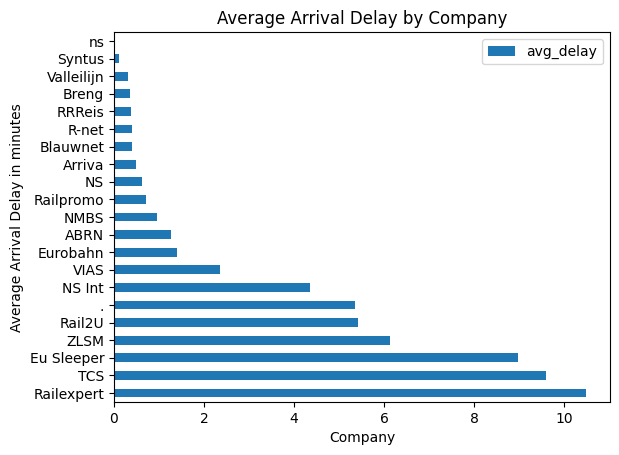

In [41]:
import matplotlib.pyplot as plt

df = df[df['avg_delay']>0]

df.plot.barh(x='company', 
            y='avg_delay', 
            title='Average Arrival Delay by Company', 
            xlabel='Company', ylabel='Average Arrival Delay in minutes')

## 7.viii) How many services were disrupted in different years? Make a line plot.

<Axes: title={'center': 'Disrupted services by year'}, xlabel='year'>

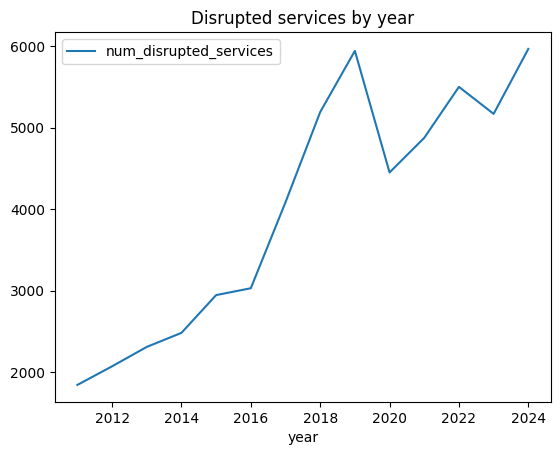

In [43]:
disrupted_by_year = db.sql("""
SELECT
EXTRACT(YEAR FROM "start_time") AS year,
COUNT(DISTINCT rdt_id) AS num_disrupted_services
FROM disruptions
WHERE start_time IS NOT NULL
GROUP BY year
ORDER BY year
""").df()


disrupted_by_year.plot.line(
    x="year",
    y="num_disrupted_services",
    title="Disrupted services by year",
)

## 7.ix) What fraction of all services were cancelled (Service:Completely cancelled) in different years? Make a line plot.

<Axes: title={'center': 'Fraction of cancelled services by year'}, xlabel='year'>

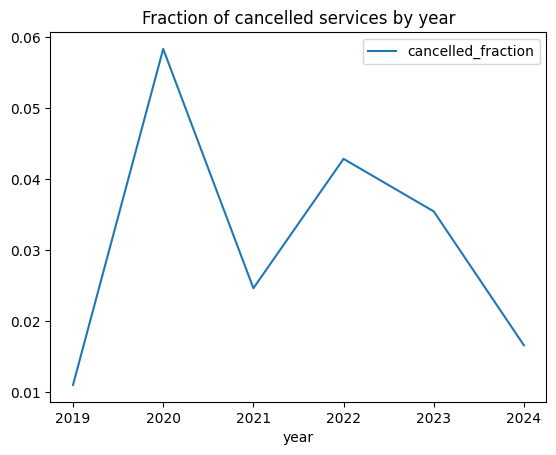

In [46]:
cancelled_fraction_by_year = db.sql("""
SELECT
EXTRACT(YEAR FROM "Service:Date") AS year,
COUNT_IF("Service:Completely cancelled" = TRUE) * 1.0 / COUNT(*) AS cancelled_fraction
FROM services
GROUP BY year
ORDER BY year
""").df()

cancelled_fraction_by_year.plot.line(
    x="year",
    y="cancelled_fraction",
    title="Fraction of cancelled services by year",
)